## 🙋‍♂️ Important Note: You Don’t Need to Understand Everything Right Away

It’s completely **normal** for many of the concepts here (like cointegration, Poisson, walk-forward, etc.) to sound advanced or unfamiliar.

🎯 **The goal right now isn’t to master them**, but to build a reference map.
This guide is meant to help you **get your bearings**, know what to look for, and how to connect ideas later on.

🧭 Think of this content as a **toolbox** or a menu of strategies.
Over time, you’ll pick one, test it, make mistakes, and gradually understand each piece better.

---

# 🧠 Methodology for Creating an Algorithmic Trading Strategy

## 📌 Introduction

**Algorithmic trading** is a rule-based approach that uses mathematics, statistics, and programming to make decisions in financial markets. Instead of relying solely on human judgment, you build **automated strategies** that can analyze data, identify opportunities, and execute trades systematically.

Designing an algorithmic strategy isn’t just about having a good idea — it requires a **clear methodology** to develop, test, and optimize that idea in a structured and repeatable way.

---

## 🔁 General Development Stages

A typical methodology for creating an algorithmic trading strategy can be divided into the following stages:

1. **Import necessary libraries**
2. **Formulate the strategy / hypothesis**
3. Collect data (market data, fundamentals, etc.)
4. Clean and prepare the data
5. Implement the algorithm
6. Simulate it (backtesting)
7. Evaluate performance
8. Optimize and fine-tune parameters
9. Out-of-sample validation and *walk-forward analysis*
10. Real-time implementation

---

## 1️⃣ Importing Libraries

The first technical step is to import the **libraries** you’ll need. Libraries (or packages) are collections of pre-written functions, tools, and structures that help you avoid "reinventing the wheel" and allow you to work more efficiently and professionally.


In [53]:
# ===========================================
# Import required libraries
# ===========================================

# Data manipulation and analysis
import pandas as pd  # For working with DataFrames
import numpy as np  # For numerical operations
import math  # For mathematical functions

# Date and time handling
from datetime import datetime, timedelta  # For working with dates and time ranges

# Visualization
import matplotlib.pyplot as plt  # For creating charts and visualizations

# Financial data APIs and data collection
import yfinance as yf  # Yahoo Finance API
from yahooquery import search  # To search for assets using YahooQuery

# MetaTrader 5
import MetaTrader5 as mt5  # To interact with the MetaTrader 5 terminal

# File system and environment variables
import os  # For interacting with the operating system
from dotenv import load_dotenv  # To load environment variables from a .env file

# JSON handling
import json  # For working with JSON data



Sure! Here's the full translation of your content into English, **with no emojis**, and with a corrected and accurate description of **High-Frequency Trading (HFT)** / Trend Following:

---

# Strategy Selection: The First Fundamental Step

Before collecting data or writing a single line of code, the most important task is to **decide the type of trading strategy you want to build**.

**Why?**

* Because **each type of strategy requires different kinds of data** (e.g., tick data vs. daily prices).
* Because **the statistical tools, tests, and validations vary** depending on the strategy.
* Because it provides clarity about the hypothesis you want to test and how to structure your algorithmic pipeline.

---

# Types of Strategies, Statistical Use, Required Data, and Examples

| Strategy                  | Statistical Involvement | Common Tests / Validations                              |
| ------------------------- | ----------------------- | ------------------------------------------------------- |
| **Scalping**              | Moderate                | Trade ratios, slippage, profit factor, Sharpe ratio     |
| **Statistical Arbitrage** | High                    | Cointegration, correlations, z-score                    |
| **Trend Following / HFT** | Moderate to High        | Robust backtesting, Sharpe ratio, walk-forward analysis |
| **Range Trading**         | Moderate                | Conditional probability, mean reversion                 |
| **Market Making**         | Very High               | Stochastic modeling, Monte Carlo, optimal control       |
| **Machine Learning**      | Very High               | Overfitting, cross-validation, error metrics            |

---

## 1. **Scalping**

**Description**:
Scalping is a very short-term strategy aimed at profiting from small price movements by executing many trades within seconds or minutes. It exploits micro-inefficiencies in price formation.

**Required data**:

* **Tick-level data** or **Level 2 order book** data.
* Execution times and latency.
* Market depth and spreads.

**Applied statistics**:

* Win rate, expected return, profit factor, intraday Sharpe ratio.
* Slippage and execution speed analysis.

**Strategy example**:

> Buy when the spread narrows below X points and there's a sudden increase in demand (order book imbalance). Exit after 3 seconds or at a 0.05% gain.

---

## 2. **Statistical Arbitrage**

**Description**:
Aims to profit from temporary price discrepancies between two assets that historically move together. The assumption is that if they diverge, they will eventually revert to their historical relationship.

**Required data**:

* Historical time series for both assets (synchronized prices).
* Adjusted prices (accounting for dividends, splits).

**Applied statistics**:

* Cointegration (Engle-Granger, Johansen).
* Z-score of price spread.
* Pearson and Spearman correlation.

**Strategy example**:

> Identify cointegration between Coca-Cola and Pepsi. When the z-score exceeds +2, short the expensive one and go long the cheaper one, expecting reversion.

---

Perfecto, ya te pillo. Aquí tienes una explicación clara y correcta sobre **HFT (High-Frequency Trading)**, sin confundirlo con otras estrategias.

---

## 3. High-Frequency Trading (HFT)

**Description:**
High-Frequency Trading (HFT) is a type of algorithmic trading that uses extremely fast and sophisticated technology to execute a large number of trades in fractions of a second. The goal is to capitalize on very small price inefficiencies or market microstructure opportunities before other participants can react.

**Data required:**

* Tick-level or even nanosecond-level data
* Full order book data (Level 2 or deeper)
* Ultra-low latency execution and network times

**Statistical methods and models:**

* Modeling order flow using Poisson or Hawkes processes
* Latency analysis and optimization
* Real-time risk and inventory control
* Execution performance metrics like fill rate and queue position

**Example strategy:**

> Submitting and canceling thousands of orders per second to maintain favorable queue priority and capture tiny spreads or arbitrage opportunities, all while managing inventory risk in real time.

---

¿Quieres que te lo ponga en formato tabla o que lo integre con el resto?


---

## 4. **Range Trading / Mean Reversion**

**Description**:
This strategy assumes that prices tend to revert to a mean after deviating. Ideal for sideways or non-trending markets.

**Required data**:

* Historical prices at daily or intraday resolution.
* Dispersion indicators (e.g., Bollinger Bands, RSI).

**Applied statistics**:

* Conditional probability of reversion.
* Mean reversion tests (ADF test).

**Strategy example**:

> Buy when the price falls below the lower Bollinger Band and the RSI is below 30. Sell when it returns to the mean.

---

## 5. **Market Making**

**Description**:
Involves providing liquidity by simultaneously posting buy and sell orders in the order book, profiting from the bid-ask spread.

**Required data**:

* Full order book (bid/ask levels).
* Latency and execution speed.
* Market depth.

**Applied statistics**:

* Poisson or Hawkes process modeling.
* Optimal inventory control.
* Monte Carlo simulations.

**Strategy example**:

> Post limit orders every 2 seconds at the best bid and ask. Cancel if not executed after a set time. Adjust quotes based on volatility.

---

## 6. **Machine Learning Strategies**

**Description**:
Uses ML algorithms to predict returns, price movements, or generate buy/sell signals based on multiple input features.

**Required data**:

* Historical data with technical indicators.
* Fundamental or alternative data (e.g., news sentiment).
* Structured dataset with features and target variable.

**Applied statistics**:

* Cross-validation techniques.
* Overfitting detection and regularization.
* Metrics: MAE, RMSE, F1-score, ROC AUC.

**Strategy example**:

> Train a Random Forest classifier to predict whether the price will rise tomorrow. Buy when the predicted probability exceeds 70%.

---

# Scientific Method as Inspiration

## Where to Find Strategy Ideas?

### Scientific Literature → Real Hypotheses, Statistical Models

* [Google Scholar](https://scholar.google.com/)
* [arXiv](https://arxiv.org/)
* [SSRN](https://www.ssrn.com/index.cfm/en/)
* [The Journal of Financial Data Science](https://www.pm-research.com/content/iijjfds)
* [QuantInsti Blog](https://blog.quantinsti.com/)
* [IEEE Xplore](https://ieeexplore.ieee.org/)
* [ScienceDirect](https://www.sciencedirect.com/)
* [JSTOR](https://www.jstor.org/) / [SpringerLink](https://link.springer.com/)

### Specialized Journals

* *The Journal of Portfolio Management*
* *Quantitative Finance*
* *Algorithmic Finance*

---

### Useful Keywords for Strategy Research

* `algorithmic trading`, `quantitative finance`
* `high-frequency trading`, `statistical arbitrage`
* `machine learning in finance`, `momentum strategy`
* `backtesting`, `financial time series`

**Advanced search example**:

```bash
"algorithmic trading" AND (mean reversion OR momentum) site:arxiv.org
```

---

## Interdisciplinary Reading = Creative Intuition

Non-financial sources can inspire innovative models for trading strategies:

* **Economics** → Market microstructure, incentives, efficiency.
* **Biology** → Population dynamics (e.g., predator-prey models).
* **Psychology** → Cognitive biases, herd behavior, decision theory.
* **Generative AI** → Sequential modeling, prediction, scenario generation.
* **Sociology** → Collective behavior, emergent patterns.
* **Climatology** → Extreme event prediction, noise and seasonality analysis.

> **Conclusion**: Before writing code, define your framework.
> Ask yourself what kind of market behavior you're trying to capture...
> then look for ways to model it using tools from multiple disciplines.

---





---

## Statistical Arbitrage Strategy

This strategy is based on identifying temporary price imbalances between two instruments that are normally highly correlated or have a long-term equilibrium relationship.

In this case:

* Due to the illiquidity of the direct PYG/ARS exchange, we use the **USD/PYG** and **USD/ARS** currency pairs instead.
* The hypothesis is that due to the cyclical nature of agricultural exports between Paraguay and Argentina, the exchange rates may exhibit mean-reverting behavior despite fundamental challenges.

### Initial Hypothesis

> *The hypothesis consists of the potential stationarity of the spread between USD/PYG and USD/ARS exchange rates, driven by cyclical agricultural export patterns and trade flows between Paraguay and Argentina. Despite fundamental issues affecting the Argentine Peso, such as inflation and economic instability, a new arbitrage opportunity could arise due to recent monetary stabilization policies under Javier Milei’s government and the adoption of a managed float (dirty float) exchange rate regime.*

### Logic behind the strategy:

1. Identify the **long-term equilibrium or cointegration** relationship between USD/PYG and USD/ARS exchange rates.
2. Calculate the **spread or price difference** and monitor for significant deviations from this equilibrium.
3. When the spread widens beyond a threshold, expect it to **revert to the mean**.
4. Execute trades accordingly:

   * If USD/PYG is undervalued relative to USD/ARS → **Buy USD/PYG, sell USD/ARS**.
   * If USD/PYG is overvalued → **Sell USD/PYG, buy USD/ARS**.

### Required data:

* Historical or real-time exchange rates for USD/PYG and USD/ARS.
* Economic indicators related to agricultural exports and trade flows (optional for deeper analysis).
* Information about monetary policy and currency regime changes.

### Common validations:

* Cointegration tests (Engle-Granger, Johansen).
* Calculation of z-score to define entry and exit thresholds.
* Backtesting including transaction costs and slippage.

---

💡 **Note:** This strategy can be seen as a form of cross-currency statistical arbitrage, potentially profitable given the new monetary policy regime and managed float system recently adopted by Argentina.

---





Sure! Here's the translation to English:

---

# Financial Data Importing: Methods and Providers

When working with financial data, especially for backtesting, analysis, or algorithmic trading, there are two main ways to **import data**:

---

## 1. Static Files (CSV)

A simple and common way is to **download CSV files**, which contain structured data about assets (stocks, indices, ETFs, etc.).
They are treated as text files that can be easily read with `pandas`:





In [54]:
# Load blue peso data
bluepeso = pd.read_csv("pesoblue_daily_usd.csv")

# Convert date column to datetime
bluepeso['category'] = pd.to_datetime(bluepeso['category'], format='%a %b %d %Y')

# Rename columns to standard names
bluepeso = bluepeso.rename(columns={'category': 'date', 'valor': 'price'})

# Set 'date' as index
bluepeso.set_index('date', inplace=True)

# Load Paraguayan peso data
peso_paraguayo = pd.read_csv("PYG_USD_daily.csv")
print(peso_paraguayo)

# Keep only relevant columns
peso_paraguayo = peso_paraguayo.loc[:, ['Price', 'Date']]

# Convert date column to datetime
peso_paraguayo['Date'] = pd.to_datetime(peso_paraguayo['Date'], format='%m/%d/%Y')

# Rename columns to match
peso_paraguayo = peso_paraguayo.rename(columns={'Date': 'date', 'Price': 'price'})

# Convert comma decimal to float
#peso_paraguayo['price'] = peso_paraguayo['price'].str.replace(',', '.').astype(float)

# Set 'date' as index
peso_paraguayo.set_index('date', inplace=True)

# Get only dates present in both datasets
common_dates = bluepeso.index.intersection(peso_paraguayo.index)

# Filter both DataFrames to the common date range
bluepeso_common = bluepeso.loc[common_dates]
peso_paraguayo_common = peso_paraguayo.loc[common_dates]

# Display result
print("Blue peso (filtered):")
print(bluepeso_common.tail())
print("\nParaguayan peso (filtered):")
print(peso_paraguayo_common.tail(100))


            Date     Price      Open      High       Low  Vol. Change %
0     05/18/2025  0.000125  0.000125  0.000125  0.000125   NaN  -89.99%
1     05/16/2025  0.001252  0.001253  0.001255  0.001250   NaN   -0.08%
2     05/15/2025  0.001253  0.001253  0.001255  0.001251   NaN    0.00%
3     05/14/2025  0.001253  0.001253  0.001255  0.001251   NaN    0.00%
4     05/13/2025  0.001253  0.001252  0.001255  0.001250   NaN    0.00%
...          ...       ...       ...       ...       ...   ...      ...
3075  01/25/2015  0.000200  0.000200  0.000200  0.000200   NaN    0.00%
3076  01/23/2015  0.000200  0.000200  0.000200  0.000200   NaN    0.00%
3077  01/22/2015  0.000200  0.000200  0.000200  0.000200   NaN    0.00%
3078  01/21/2015  0.000200  0.000200  0.000200  0.000200   NaN    0.00%
3079  01/20/2015  0.000200  0.000200  0.000200  0.000200   NaN    0.00%

[3080 rows x 7 columns]
Blue peso (filtered):
             price
date              
2025-05-13  1170.0
2025-05-14  1160.0
2025-05-15  1

# 📄 1. Financial APIs

To obtain real-time or historical data programmatically, **APIs (Application Programming Interfaces)** are used.

These usually require authentication via keys (API Keys), and each provider has its own logic, but they allow access to:

* Historical or real-time prices
* Fundamental data
* Index composition
* Tick-level prices



* **Tiingo**: Pricing ranges from \$10 to \$65 per month.

  * Covers stocks, ETFs, and foreign exchange markets.
  * Provides official data with dividend and split adjustments.
  * Tick and intraday data availability is limited.
  * Offers an API for easy access.
  * Recommended for users seeking simplicity and reliable data quality.

* **Polygon.io**: Monthly fees between \$29 and \$199.

  * Supports stocks, cryptocurrencies, and FX assets.
  * Delivers official data, including dividend and split adjustments.
  * Provides detailed tick-level and intraday data.
  * API access is available.
  * Suitable for heavy data users requiring tick-level information.

* **Quandl (Nasdaq Data Link)**: Free options available, with paid plans starting at \$50 per month.

  * Focuses on stocks and ETFs.
  * Offers official data with dividend and split adjustments.
  * Tick and intraday data are limited.
  * Includes API support.
  * Aggregates data from multiple sources like WIKI and EOD.

* **Bloomberg**: Costs start around \$2,000 monthly.

  * Provides comprehensive coverage of all asset classes.
  * Official, high-quality data with dividend and split adjustments.
  * Full tick and intraday data access.
  * API available but at a high cost.
  * Considered the institutional standard, often too expensive for retail traders.

* **Interactive Brokers (IBKR, professional account)**: No monthly fee plus \$1.5 per market data subscription.

  * Real stock market data.
  * Official data with dividend and split adjustments.
  * Tick and intraday data access is limited.
  * API availability is partial.
  * Ideal for execution and real-time market data integration.

* **Tickmill combined with MetaTrader**: Free access with an account.

  * Focus on CFDs including indices and FX.
  * Does not provide official data or adjustments for dividends/splits.
  * Tick and intraday data available but limited.
  * Access through scripting APIs.
  * Useful for technical trading strategies but less suitable for backtesting.

* **Alpaca Markets**: Free access for both paper trading and live accounts.

  * Offers stocks and ETFs data.
  * Official data is sourced via Polygon, including dividend and split adjustments.
  * Tick and intraday data fully available.
  * Provides a comprehensive API.
  * Good choice for US stock trading and automated trading bots.

* **Yahoo Finance**: Free of charge.

  * Covers stocks and ETFs.
  * Data is unofficial and may lack guarantees.
  * Dividend and split adjustments are inconsistent.
  * No tick or intraday data available.
  * API access is limited.
  * Suitable primarily for prototyping rather than live or arbitrage trading.



## Acquiring an API Token



## 🔐 Authentication in Financial APIs

### 🧾 Why is it necessary?

* Protection of sensitive data
* User authentication
* Legal compliance (e.g., PSD2, PCI-DSS)
* Fraud prevention

### 🔧 Common methods

* **API Key**: Simple, medium security
* **OAuth 2.0**: Token-based, high security, banking industry standard
* **JWT (JSON Web Token)**: Signed tokens, secure
* **Username + Password**: Sometimes combined with 2FA, less commonly used
* **Digital Certificates**: High security

### 🔄 Typical OAuth 2.0 flow

1. User logs in
2. Redirect to financial institution
3. Authorization → *Authorization code*
4. Exchange code for *Access Token*
5. Use the token to access the API



## Making Our First API Call

Now it's time to structure our API calls to MetaTrader5. 

We need the following information from the API:

* Price Information from NZD_USD



In [55]:
# ===========================================
# Load environment variables from .env file
# ===========================================
# Create a .env file in the same folder and include:
# MT5_LOGIN=12345678
# MT5_PWD=your_password
# This helps protect your credentials.
load_dotenv()

MT5_LOGIN = os.getenv('MT5_LOGIN')
MT5_PWD = os.getenv('MT5_PWD')

# ===========================================
# Initialize and connect to MetaTrader 5
# ===========================================
mt5.initialize()

# Log in to your MT5 account (make sure MetaTrader 5 is running and connected)
# Replace 'MetaQuotes-Demo' with your broker's server if needed
mt5.login(int(MT5_LOGIN), MT5_PWD, 'MetaQuotes-Demo')


# ===========================================
# Define time range for data request
# ===========================================
from_date = datetime(2015, 5, 19)
to_date = datetime(2025, 5, 19)


NZD_USD = mt5.copy_rates_range("NZDUSD", mt5.TIMEFRAME_D1, from_date,to_date)
# Convert to DataFrame
NZD_USD = pd.DataFrame(NZD_USD)

# Convert timestamp to datetime and rename
NZD_USD['date'] = pd.to_datetime(NZD_USD['time'], unit='s')

# Rename 'close' to 'price' and keep only needed columns
NZD_USD = NZD_USD.loc[:, ['date', 'close']].rename(columns={'close': 'price'})

# Set 'date' as index
NZD_USD.set_index('date', inplace=True)

common_dates = NZD_USD.index.intersection(peso_paraguayo.index)

NZD_USD = NZD_USD.loc[common_dates]

print("NZD_USD data:\n")
print(NZD_USD.head())

mt5.shutdown()

NZD_USD data:

              price
date               
2015-05-19  0.73422
2015-05-20  0.73041
2015-05-21  0.73472
2015-05-22  0.73024
2015-05-25  0.73070


True


## Adding Our Stocks Data to a Pandas DataFrame

The next thing we need to do is **add our stock's price and market capitalization to a pandas DataFrame**, using a common reference currency — **USD** in this case. Think of a DataFrame like the Python version of a spreadsheet. It stores tabular data.

By converting all values to USD, we ensure consistent comparisons across different markets, especially when stocks are priced in different local currencies. This is essential when analyzing companies from multiple countries or regions.

---


             price
count  3080.000000
mean      0.000461
std       0.000510
min       0.000125
25%       0.000155
50%       0.000178
75%       0.000200
max       0.001460


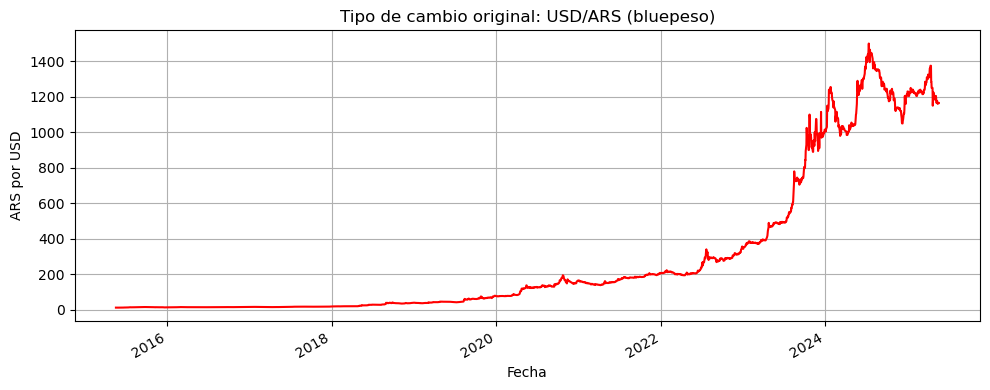

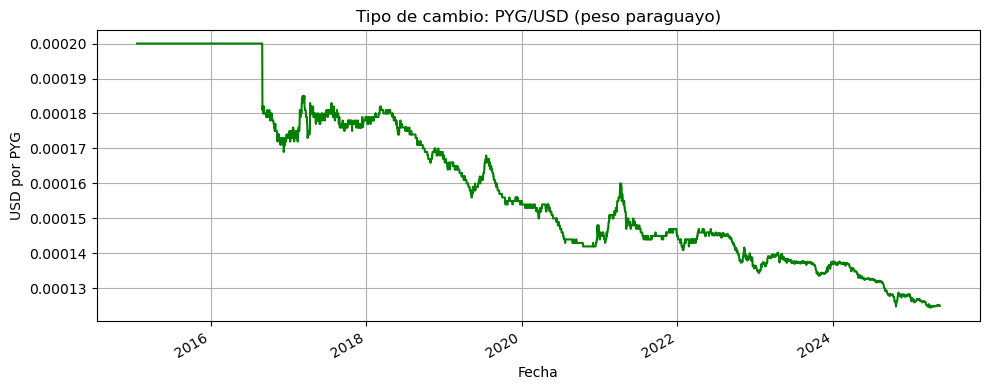

             price
count  3080.000000
mean      0.000161
std       0.000023
min       0.000124
25%       0.000143
50%       0.000155
75%       0.000178
max       0.000200
DatetimeIndex(['2025-05-18', '2025-05-16', '2025-05-15', '2025-05-14',
               '2025-05-13', '2025-05-12', '2025-05-09', '2025-05-08',
               '2025-05-07', '2025-05-06',
               ...
               '2015-01-30', '2015-01-29', '2015-01-28', '2015-01-27',
               '2015-01-26', '2015-01-25', '2015-01-23', '2015-01-22',
               '2015-01-21', '2015-01-20'],
              dtype='datetime64[ns]', name='date', length=3080, freq=None)
               price
date                
2025-05-18  0.000125
2025-05-16  0.000125
2025-05-15  0.000125
2025-05-14  0.000125
2025-05-13  0.000125
2015-01-20 00:00:00
2025-05-18 00:00:00
(2157, 1)
       price
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
DatetimeIndex([], dtype='datetime64[ns]', name='da

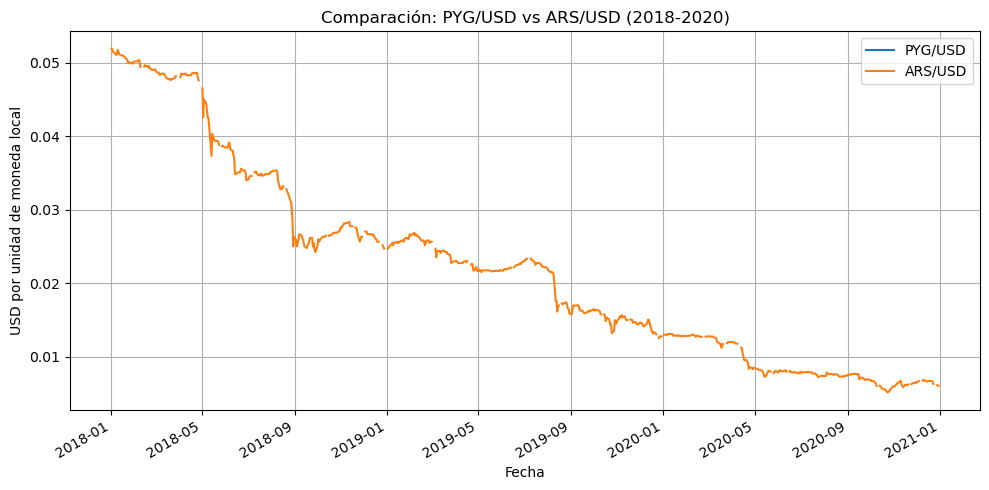

In [56]:

print(peso_paraguayo.describe())

mask = peso_paraguayo['price'] > 0.00099


# Función para dividir entre 10 si el valor es del orden de 10^-2
def ajustar_price(valor):
    if 0.00099 <= valor < 0.1:
        return valor / 10
    return valor

# Aplicar la función solo a las filas filtradas
peso_paraguayo.loc[mask, 'price'] = peso_paraguayo.loc[mask, 'price'].apply(ajustar_price)
peso_paraguayo.index = pd.to_datetime(peso_paraguayo.index)

# --- 1. Graficar USD/ARS original (bluepeso) ---
bluepeso['price'].plot(figsize=(10, 4), color='red')
plt.title('Tipo de cambio original: USD/ARS (bluepeso)')
plt.xlabel('Fecha')
plt.ylabel('ARS por USD')
plt.grid(True)
plt.tight_layout()
plt.show()


# --- 2. Graficar PYG/USD original ---
peso_paraguayo['price'].plot(figsize=(10, 4), color='green')
plt.title('Tipo de cambio: PYG/USD (peso paraguayo)')
plt.xlabel('Fecha')
plt.ylabel('USD por PYG')
plt.grid(True)
plt.tight_layout()
plt.show()



print(peso_paraguayo.describe())
print(peso_paraguayo.index)
print(peso_paraguayo.head())
print(peso_paraguayo.index.min())
print(peso_paraguayo.index.max())
# Asegurarse de que el índice sea de tipo datetime


# Filtrar desde 2018-01-01 en adelante
peso_paraguayo_desde_2018 = peso_paraguayo.loc[peso_paraguayo.index >= pd.to_datetime('2018-01-01')]
# Mostrar las primeras 600 filas
print(peso_paraguayo_desde_2018.shape)

start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2020-12-31')

ARS_USD = 1 / bluepeso

ARS_USD = ARS_USD.loc[start_date:end_date]

PYG_USD = peso_paraguayo.loc[start_date:end_date]
PYG_USD = peso_paraguayo.loc[start_date:end_date]

print(PYG_USD.describe())
print(PYG_USD.index)
print(PYG_USD.head())



NZD_USD = NZD_USD.loc[start_date:end_date]

y = pd.concat([
    ARS_USD['price'],
    PYG_USD['price'],
    NZD_USD['price']
], axis=1)

# Renombramos columnas
y.columns = ['ARS/USD', 'PYG/USD', 'NZD/USD']

print(y[['PYG/USD', 'ARS/USD']].describe())


print(y[['PYG/USD', 'ARS/USD']].isna().sum())
print(y[['PYG/USD', 'ARS/USD']].dropna().head())

# Gráfico comparativo ARS/USD vs PYG/USD
y[['PYG/USD', 'ARS/USD']].plot(figsize=(10, 5))
plt.title('Comparación: PYG/USD vs ARS/USD (2018-2020)')
plt.xlabel('Fecha')
plt.ylabel('USD por unidad de moneda local')
plt.grid(True)
plt.legend(['PYG/USD', 'ARS/USD'])
plt.tight_layout()
plt.show()


*EN DESARROLLO*

*EN DESARROLLO*

In [57]:
import numpy as np
import pandas as pd

def moving_avg(x, window):
    return x.rolling(window=window).mean()

def moving_std(x, window):
    return x.rolling(window=window).std()

entryZscore = 1
exitZscore = 0
lookback = 20

# Suponemos que yport es un pandas Series
zScore = (yport - moving_avg(yport, lookback)) / moving_std(yport, lookback)

# Condiciones de entrada/salida
longsEntry = zScore < -entryZscore      # Entrar en largo
longsExit = zScore >= -exitZscore       # Salir de largo
shortsEntry = zScore > entryZscore      # Entrar en corto
shortsExit = zScore <= exitZscore       # Salir de corto

# Inicializar posiciones
numUnitsLong = pd.Series(np.nan, index=yport.index)
numUnitsShort = pd.Series(np.nan, index=yport.index)

numUnitsLong.iloc[0] = 0
numUnitsLong[longsEntry] = 1
numUnitsLong[longsExit] = 0
numUnitsLong = numUnitsLong.ffill()  # Rellenar valores perdidos

numUnitsShort.iloc[0] = 0
numUnitsShort[shortsEntry] = -1
numUnitsShort[shortsExit] = 0
numUnitsShort = numUnitsShort.ffill()

numUnits = numUnitsLong + numUnitsShort  # Total de unidades netas (zscore)


NameError: name 'yport' is not defined

In [ ]:

from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Supongamos que audusd.cl y usdcad.cl ya están cargados como DataFrames con 'close' como columna

# Convert USDCAD to CADUSD
cad = 1. / usdcad['close'].values
print(cad)
aud = audusd['close'].values

# Combine into a 2D array
y = np.column_stack((aud, cad))

trainlen = 250
lookback = 20

hedgeRatio = np.full_like(y, np.nan)
numUnits = np.full(y.shape[0], np.nan)

for t in range(trainlen, len(y)):
    # Apply Johansen test on log prices over the training window
    res = coint_johansen(np.log(y[t - trainlen:t]), det_order=0, k_ar_diff=1)
    beta = res.evec[:, 0]  # First eigenvector (cointegrating vector)
    hedgeRatio[t, :] = beta

    # Compute portfolio spread over the lookback window
    y_window = y[t - lookback + 1:t + 1]
    spread = np.sum(y_window * beta.reshape(1, -1), axis=1)

    ma = spread.mean()
    std = spread.std()
    zScore = (spread[-1] - ma) / std

    numUnits[t] = -zScore  # Mean reversion strategy: go short when z > 0, long when z < 0

# Create full position matrix
positions = numUnits[:, None] * hedgeRatio * y

# Function to lag an array by 1 (like MATLAB's lag)
def lag(arr):
    return np.vstack([np.full((1, arr.shape[1]), np.nan), arr[:-1]])

# Calculate PnL
pnl = np.nansum(lag(positions) * (y - lag(y)) / lag(y), axis=1)

# Calculate returns
capital = np.nansum(np.abs(lag(positions)), axis=1)
ret = pnl / capital

# Wrap up in DataFrame if desired
results = pd.DataFrame({
    'pnl': pnl,
    'ret': ret,
    'zScore': numUnits
})


NameError: name 'usdcad' is not defined

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# --- Parte 1: Kalman Filter para regresión adaptativa ---

def kalman_regression(x, y, delta=0.0001, Ve=0.001):
    x = np.hstack([x, np.ones((x.shape[0], 1))])  # añade columna de unos

    yhat = np.full(y.shape, np.nan)
    e = np.full(y.shape, np.nan)
    Q = np.full(y.shape, np.nan)

    P = np.zeros((2, 2))
    beta = np.full((2, x.shape[0]), np.nan)
    Vw = (delta / (1 - delta)) * np.eye(2)
    beta[:, 0] = 0

    for t in range(len(y)):
        if t > 0:
            beta[:, t] = beta[:, t - 1]
            R = P + Vw
        else:
            R = P

        yhat[t] = x[t, :] @ beta[:, t]
        Q[t] = x[t, :] @ R @ x[t, :].T + Ve
        e[t] = y[t] - yhat[t]

        K = R @ x[t, :].T / Q[t]
        beta[:, t] = beta[:, t] + K * e[t]
        P = R - np.outer(K, x[t, :]) @ R

    return beta, yhat, e, Q
trainlen = 250
lookback = 20

# usdcad_cl, audusd_cl: deben ser arrays o series con precios
cad = 1.0 / usdcad_cl
aud = audusd_cl
y = np.column_stack([aud, cad])

hedgeRatio = np.full_like(y, np.nan)
numUnits = np.full(y.shape[0], np.nan)

for t in range(trainlen, len(y)):
    data = np.log(y[t - trainlen:t])
    res = coint_johansen(data, det_order=0, k_ar_diff=1)
    hedge = res.evec[:, 0]
    hedgeRatio[t, :] = hedge

    yport = np.sum(y[t - lookback + 1:t + 1] * hedge, axis=1)
    ma = yport.mean()
    mstd = yport.std()
    zScore = (yport[-1] - ma) / mstd
    numUnits[t] = -zScore
positions = numUnits[:, None] * hedgeRatio * y

def lag(mat, n=1):
    return np.vstack([np.full((n, mat.shape[1]), np.nan), mat[:-n]])

pnl = np.nansum(lag(positions, 1) * (y - lag(y, 1)) / lag(y, 1), axis=1)
ret = pnl / np.nansum(np.abs(lag(positions, 1)), axis=1)
 explicame la función filter 


